<a href="https://colab.research.google.com/github/BaberFaisal/Codealpha_project_Titanic-_predictions/blob/main/Titanic__Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
df = pd.read_csv("/content/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


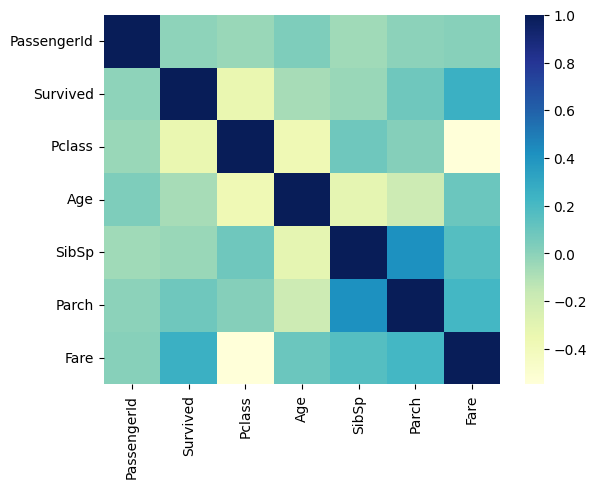

In [24]:
#Want to see avriables' related with survived
sns.heatmap(df.select_dtypes(include=np.number).corr(), cmap= "YlGnBu")
plt.show()

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_indices, test_indices in split.split(df, df["Survived"]):
  strat_train_set = df.loc[train_indices]
  strat_test_set = df.loc[test_indices]

In [26]:
 strat_test_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
565,566,0,3,"Davies, Mr. Alfred J",male,24.0,2,0,A/4 48871,24.1500,NaN,S
160,161,0,3,"Cribb, Mr. John Hatfield",male,44.0,0,1,371362,16.1000,NaN,S
553,554,1,3,"Leeni, Mr. Fahim (""Philip Zenni"")",male,22.0,0,0,2620,7.2250,NaN,C
860,861,0,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S
241,242,1,3,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,367230,15.5000,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
91,92,0,3,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,347466,7.8542,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
473,474,1,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,23.0,0,0,SC/AH Basle 541,13.7917,D,C


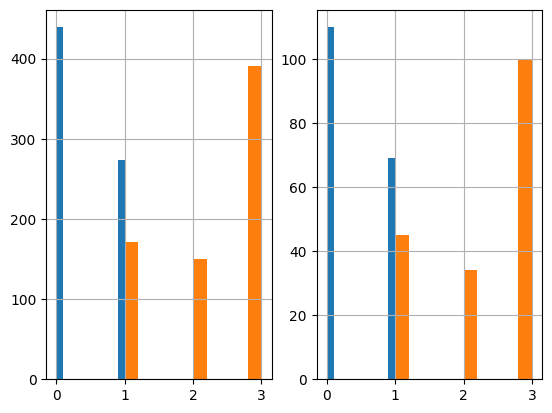

In [27]:
plt.subplot(1,2,1)
strat_train_set["Survived"].hist()
strat_train_set["Pclass"].hist()
plt.subplot(1,2,2)
strat_test_set["Survived"].hist()
strat_test_set["Pclass"].hist()
plt.show()

In [28]:
# Imputing ages
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
class AgeImputer(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self

  def transform(self, X):
    imputer = SimpleImputer(strategy= "mean")
    X["Age"] = imputer.fit_transform(X[["Age"]])
    return X


In [29]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        column_names = ["C", "S", "Q", "N"]
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]

        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        column_names = ["Female", "Male"]
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        return X


In [30]:

class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis=1, errors="ignore")

In [31]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('ageimputer', AgeImputer()),
    ('featureencoder', FeatureEncoder()),
    ('featuredropper', FeatureDropper())
])

strat_train_set = pipeline.fit_transform(strat_train_set)

In [33]:
from sklearn.preprocessing import StandardScaler
X = strat_train_set.drop(["Survived"], axis =1) # Changed strat__train_set to strat_train_set
y = strat_train_set["Survived"] # Changed strat__train_set to strat_train_set
scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

In [34]:
X_data

array([[ 9.66222014e-01,  8.29567547e-01, -5.46322934e-16, ...,
         6.16315634e-01, -7.42427274e-01,  7.42427274e-01],
       [ 1.46118705e-01, -3.70944838e-01, -5.46322934e-16, ...,
         6.16315634e-01, -7.42427274e-01,  7.42427274e-01],
       [ 3.24909000e-01, -1.57145722e+00, -5.46322934e-16, ...,
         6.16315634e-01, -7.42427274e-01,  7.42427274e-01],
       ...,
       [ 1.13723882e+00,  8.29567547e-01,  1.39877270e+00, ...,
         6.16315634e-01,  1.34693328e+00, -1.34693328e+00],
       [ 7.22705396e-02, -1.57145722e+00,  1.32188459e+00, ...,
         6.16315634e-01, -7.42427274e-01,  7.42427274e-01],
       [ 2.47174089e-01, -1.57145722e+00, -5.46322934e-16, ...,
         6.16315634e-01, -7.42427274e-01,  7.42427274e-01]])

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier()
param_grid = [{
    "n_estimators":[10,100,200,500], "max_depth":[None,5,10], "min_samples_split": [2,3,4]


}]
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring = "accuracy",return_train_score = True) # Changed true to True
grid_search.fit(X_data,y_data) # Changed grid_serach to grid_search, fit to grid_search.fit, and x_data to X_data

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [37]:
final_clf = grid_search.best_estimator_

In [38]:
final_clf


RandomForestClassifier(max_depth=10, min_samples_split=3)

In [39]:
start_test_set = pipeline.fit_transform(strat_test_set)

In [41]:
X = strat_train_set.drop(["Survived"], axis =1) # Changed strat__train_set to strat_train_set and "Survivred" to "Survived"
y = strat_train_set["Survived"] # Changed strat__train_set to strat_train_set and "Survivred" to "Survived"
scaler = StandardScaler()
X_data_test = scaler.fit_transform(X)
# Assuming y_test should be y since y is the target variable for the training set
y_data_test = y.to_numpy() # Changed y_test to y

In [42]:
final_clf.score(X_data_test,y_data_test)

0.9536516853932584

In [43]:
final_data = pipeline.fit_transform(df)


In [45]:
X_final = final_data.drop(["Survived"], axis =1)
y_final = final_data["Survived"]
scaler = StandardScaler()
X_data_finalt = scaler.fit_transform(X_final)
X_final = y_final.to_numpy()

In [51]:
# ipython-input-45-31565b7b0f72
X_final = final_data.drop(["Survived"], axis =1)
y_final = final_data["Survived"]
scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final) # Changed X_data_finalt to X_

In [52]:
df1 = pd.read_csv("/content/test.csv")
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [53]:
final_test_data = pipeline.fit_transform(df1)

In [54]:
X_final_test = final_test_data
X_final_test = X_final_test.fillna(method = "ffill")
scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

<ipython-input-54-bbd96bd0ca19>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_final_test = X_final_test.fillna(method = "ffill")


In [65]:
# Assign the best estimator from the grid search to prod_final_clf
prod_final_clf = grid_search.best_estimator_

# Make predictions
predictions = prod_final_clf.predict(X_data_final_test)

In [67]:
prod_clf = RandomForestClassifier()
param_grid = [{
    "n_estimators":[10,100,200,500], "max_depth":[None,5,10], "min_samples_split": [2,3,4]
}]
# Explicitly set refit=True to ensure best_estimator_ is available
grid_search = GridSearchCV(prod_clf, param_grid, cv=5, scoring = "accuracy",return_train_score = True, refit=True)
# Fit the GridSearchCV object to the data
grid_search.fit(X_data_final, y_final)
prod_final_clf = grid_search.best_estimator_

In [70]:
# Create a DataFrame for predictions using the index from the test dataset (df1)
submission_df = pd.DataFrame({'PassengerId': df1['PassengerId'], 'Survived': predictions})

In [71]:
final_df

,PassengerId
0,1
1,2
2,3
3,4
4,5
...,...
886,887
887,888
888,889
889,890
